In [115]:
import pandas as pd
import numpy as np


In [116]:
df=pd.read_csv("Laptop_price.csv")

In [117]:
df.head()

,Brand,Processor_Speed,RAM_Size,Storage_Capacity,Screen_Size,Weight,Price
0,Asus,3.830296,16,512,11.185147,2.641094,17395.093060
1,Acer,2.912833,4,1000,11.311372,3.260012,31607.605920
2,Lenovo,3.241627,4,256,11.853023,2.029061,9291.023542
3,Acer,3.806248,16,512,12.280360,4.573865,17436.728330
4,Acer,3.268097,32,1000,14.990877,4.193472,32917.990720


In [118]:
df.shape

(1000, 7)

In [119]:
df.isna().sum()

Brand               0
Processor_Speed     0
RAM_Size            0
Storage_Capacity    0
Screen_Size         0
Weight              0
Price               0
dtype: int64

In [120]:
df['Brand'].value_counts()

Brand
Dell      210
Asus      206
Acer      204
Lenovo    190
HP        190
Name: count, dtype: int64

In [121]:
df['Price'].max()

33503.93504

In [122]:
import matplotlib.pyplot as plt

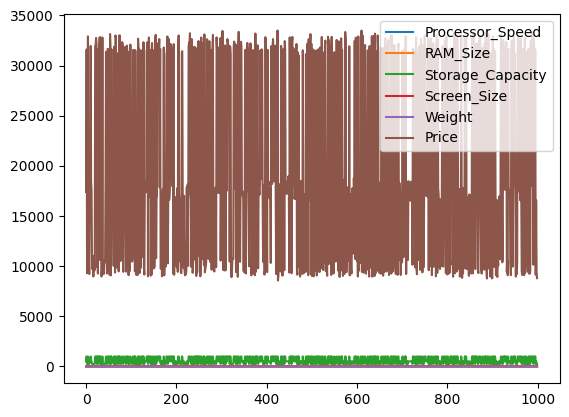

In [123]:
df.plot()
plt.show()

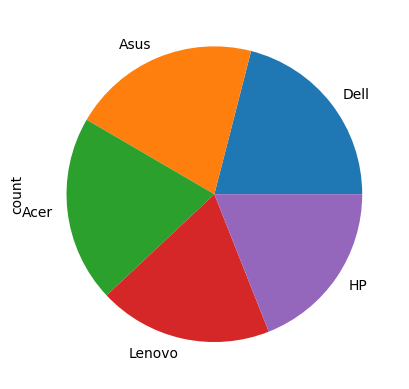

In [124]:
df['Brand'].value_counts().plot(kind='pie',)
plt.show()

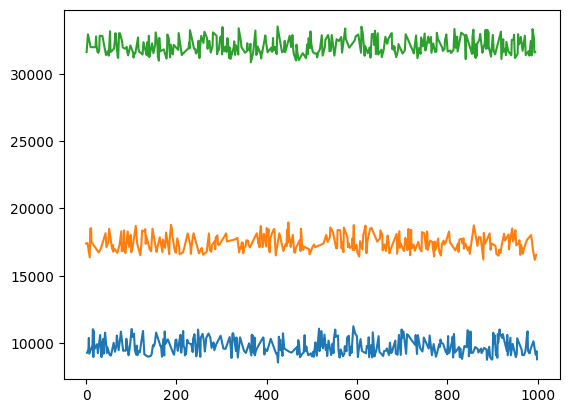

In [125]:
df['Price'].groupby(df['Storage_Capacity']).plot(kind='line')
plt.show()

In [126]:
df.columns

Index(['Brand', 'Processor_Speed', 'RAM_Size', 'Storage_Capacity',
       'Screen_Size', 'Weight', 'Price'],
      dtype='object')

In [127]:
X=df[['Processor_Speed','RAM_Size','Storage_Capacity']]

In [128]:
X

,Processor_Speed,RAM_Size,Storage_Capacity
0,3.830296,16,512
1,2.912833,4,1000
2,3.241627,4,256
3,3.806248,16,512
4,3.268097,32,1000
...,...,...,...
995,3.343584,4,1000
996,2.780555,8,256
997,3.200569,4,512
998,1.604182,8,256


In [129]:
y=df['Price']

In [130]:
y

0      17395.093060
1      31607.605920
2       9291.023542
3      17436.728330
4      32917.990720
           ...     
995    31593.668020
996     9149.521832
997    16552.404780
998     9407.473459
999     8807.696702
Name: Price, Length: 1000, dtype: float64

In [131]:
#from sklearn.preprocessing import MinMaxScaler

In [132]:
#scaler=MinMaxScaler()

In [133]:
from sklearn.model_selection import train_test_split

In [134]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

In [135]:
X_train.shape,y_train.shape

((800, 3), (800,))

In [136]:
X_test.shape,y_test.shape

((200, 3), (200,))

In [137]:
#X_train_scaled=scaler.fit_transform(X_train)

In [138]:
#X_test_scaled=scaler.transform(X_test)

In [139]:
from sklearn.ensemble import RandomForestRegressor

In [140]:
rfmodel=RandomForestRegressor()

In [141]:
rfmodel.fit(X_train,y_train)

RandomForestRegressor()

In [142]:
prediction=rfmodel.predict(X_test)

In [143]:
prediction

array([10409.0904619 , 16942.5178857 ,  9919.57532529,  9810.0278686 ,
        9832.46316233, 31578.5827348 , 17952.5650606 ,  9653.86811448,
       17632.4820416 , 18392.1137947 , 17299.9205321 ,  9058.89550285,
       31598.9944733 , 17952.5650606 , 18485.2004334 , 31443.9116519 ,
        9362.9173394 , 31954.6424078 , 17368.8959541 , 17091.59571   ,
       31309.8041242 , 10579.1835432 , 10315.797763  , 17305.362402  ,
       18695.0623321 , 31643.87737   , 17178.1996191 , 17215.8280043 ,
        9458.41716762, 16743.2212232 , 31539.4430919 , 10450.9892388 ,
        9619.08234422,  9944.89098952, 31831.8423734 ,  9145.69150679,
       17546.5333899 ,  9277.02118954,  9950.22653718, 17414.1542829 ,
       16539.9645506 , 32856.6968915 , 16850.8153369 ,  9369.97659221,
       32952.8535811 ,  9415.73309102, 31590.5682561 ,  9078.84225869,
       17318.3993494 , 18266.5848038 , 10416.5651341 , 10458.9053452 ,
        9123.71939633, 31740.8298337 , 17295.6688213 , 33216.8475963 ,
      

In [144]:
from sklearn.metrics import mean_squared_error

In [145]:
mse=mean_squared_error(y_test,prediction)

In [146]:
mse

54138.33869615534

In [147]:
import joblib

In [148]:
joblib.dump(rfmodel,"regmodel.pkl")

['regmodel.pkl']

In [149]:
X.columns

Index(['Processor_Speed', 'RAM_Size', 'Storage_Capacity'], dtype='object')

In [150]:
print(type(rfmodel))

<class 'sklearn.ensemble._forest.RandomForestRegressor'>
